In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from model import NewsVendorModel
import params

C:\Users\Patrick\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Simulate game 
agent_types = ['greedy', 'greedy']
model = NewsVendorModel(agent_type=agent_types)

for _ in range(params.ROUNDS):
    model.step()

# Pull data 
model_df = model.datacollector.get_model_vars_dataframe()   # index: Step
agent_df = model.datacollector.get_agent_vars_dataframe()   # index: Step, AgentID

In [3]:
df = agent_df.reset_index()

price_data = df[df["AgentID"] == 1][["Step", "Order Quantity"]].rename(columns={"Order Quantity": "Price"})

qty_data = df[df["AgentID"] == 2][["Step", "Order Quantity", "Reward"]].rename(columns={"Order Quantity": "Quantity"})

combined_df = pd.merge(price_data, qty_data, on="Step")

final_df = pd.merge(combined_df, model_df, left_on="Step", right_index=True)

In [7]:
final_df.tail(50)


,Step,Price,Quantity,Reward,Regret,Demand
314,315.0,16.5,34.0,459.000000,0,39.284290
315,316.0,16.5,34.0,459.000000,0,42.915458
316,317.0,16.5,34.0,459.000000,0,35.275762
317,318.0,16.5,34.0,459.000000,0,52.145839
318,319.0,16.5,27.0,364.500000,0,85.066964
319,320.0,0.9,34.0,-71.400000,0,50.073503
320,321.0,16.5,34.0,459.000000,0,40.343489
321,322.0,16.5,34.0,459.000000,0,53.962471
322,323.0,16.5,34.0,459.000000,0,49.758690
323,324.0,16.5,34.0,459.000000,0,46.456462


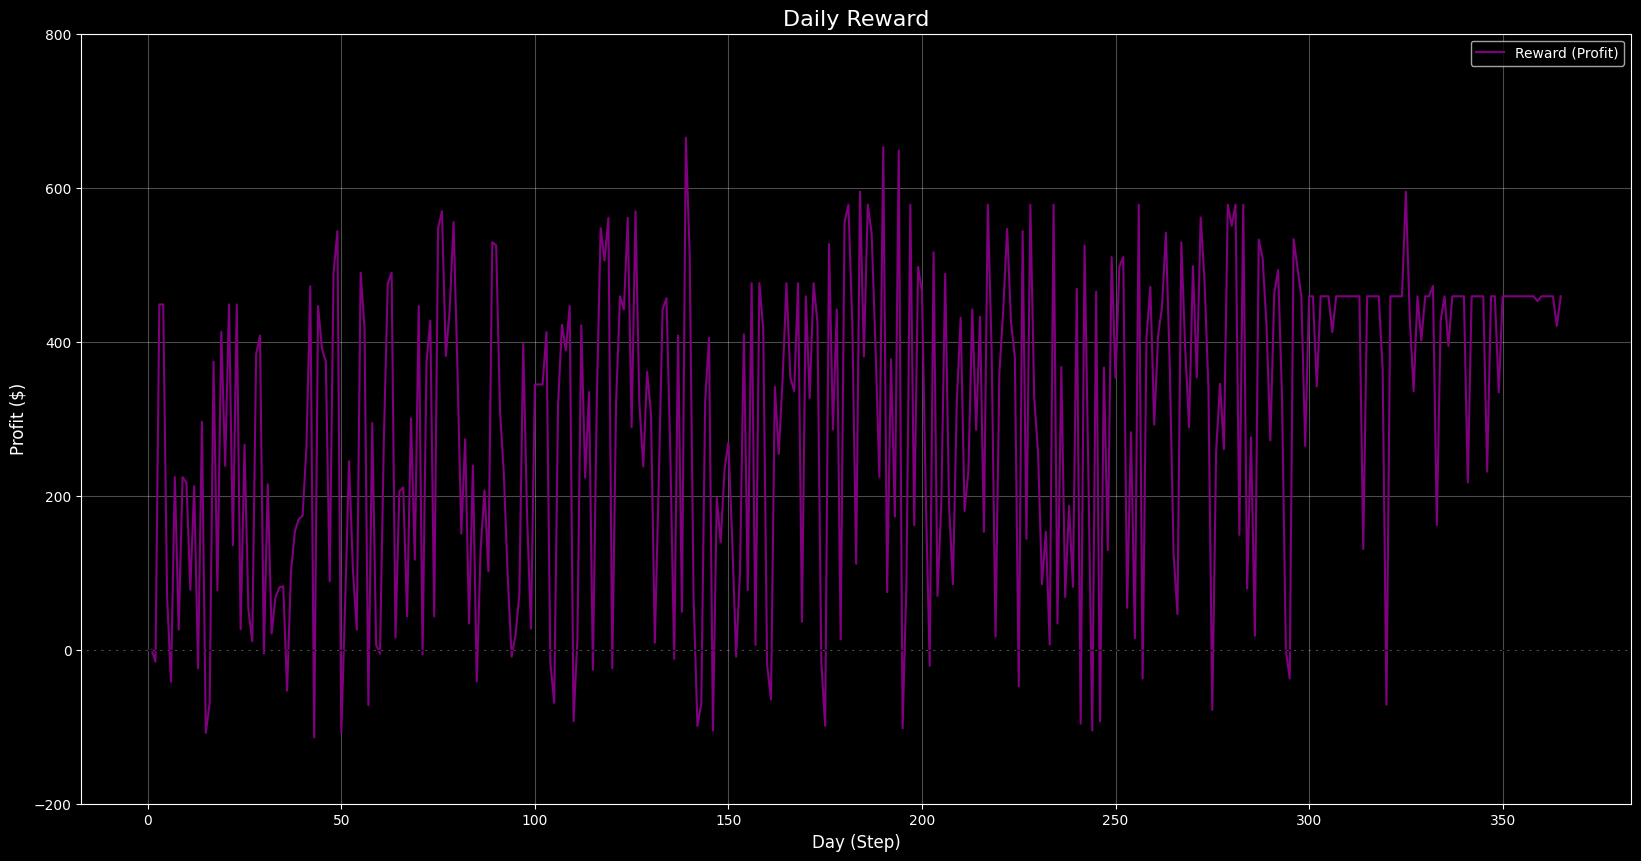

In [10]:
#Reward Plot

reward_data = df[df["AgentID"] == 1][["Step", "Reward"]]

plt.figure(figsize=(20, 10))
plt.plot(reward_data['Step'], reward_data['Reward'], color='purple', label='Reward (Profit)', linewidth=1.5)

plt.ylim(-200, 800)

plt.axhline(0, color='black', linewidth=1, linestyle='--')

plt.xlabel('Day (Step)', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.title('Daily Reward', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()